In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#obtaining review data to understand the frequency of customers staying in a particular listing
reviews=pd.read_csv("reviews.csv")
reviews['date']=pd.to_datetime(reviews['date'])
reviews.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments
0,0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\r\n"
1,1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,2,9835,23731188,2014-08-12,2478713,Karyn,This was my first time using airbnb and it was...
3,3,9835,46588875,2015-12-09,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,4,10803,3333588,2013-12-01,4421189,Johannes,It was very convenient to stay in Lindsay's a...


In [32]:
new_data=pd.read_csv("new_data.csv")
new_data.head()

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,12,19,20,28,37,38,44,45,54,55,56,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,name,summary,space,description,neighborhood_overview,notes,transit,access,...,rank,distance,distance_in_km,cardinal_direction,median_prices,distance_bins,annual_rental,daily_rental,accommodate_price,estimated_revenue
0,0.0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",...,119.0,12.5km,12.5,East,1259700.0,10 to 20 km from CBD,75582.0,207.073973,30.000000,120.0
1,1.0,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,...,26.0,4.7km,4.7,North,1133400.0,within 10 km from CBD,68004.0,186.312329,17.500000,5407.5
2,2.0,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,...,42.0,6.1km,6.1,South,1689800.0,within 10 km from CBD,101388.0,277.775342,52.666667,2212.0
3,3.0,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood â it is quiet,...",A simple self service breakfast is available â...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,...,51.0,6.9km,6.9,North-east,1128600.0,within 10 km from CBD,67716.0,185.523288,50.000000,2900.0
4,4.0,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,...,50.0,6.7km,6.7,South-east,1318500.0,within 10 km from CBD,79110.0,216.739726,34.500000,2104.5


# 5.2 - Data Storytelling 

# Assumptions

In order to understand the revenue generated for an Airbnb property, I've used the estimated revenue which is calculated below:-

(number of reviews x price x minimum nights) / accommodates

Here I'm assuming that the number of reviews is the number of tenants each listing has generated and the minimum nights is a conservative figure assuming that Airbnb customers are only renting based on the minimum nights. Dividing this total revenue to the number of each property is able to accommodate to normalise the data

The number of properties listed in Melbourne Airbnb have increased significantly compared 2009 with its peak in 2015. 
This only means, the increase of competition if you would like to be an Airbnb host. As such, how are you going to distinguish yourself from the rest and has the highest revenue. Read ahead. 

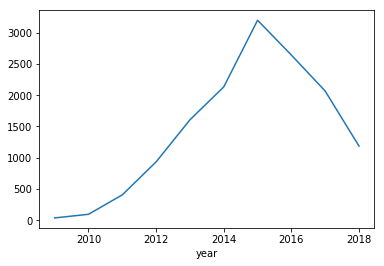

In [39]:
host_since_clean = new_data['host_since'].dropna()
host_since_clean['year']=host_since_clean.dt.year
graphed=host_since_clean.groupby("year").count()
graphed.plot()

By using the complete reviews data, the highest number of Airbnb customers are in the month of October. Whereas, the lowest are in the months between May and June. 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  


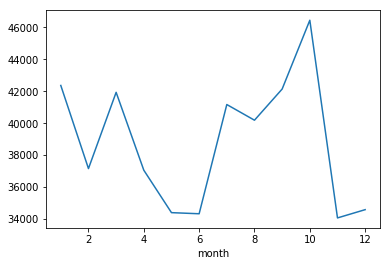

In [43]:
#reviews['date']=pd.to_datetime(reviews['date'])
listing_dates["month"]=reviews["date"].dt.month
graphed=listing_dates.groupby("month").count()
graphed.plot()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  after removing the cwd from sys.path.


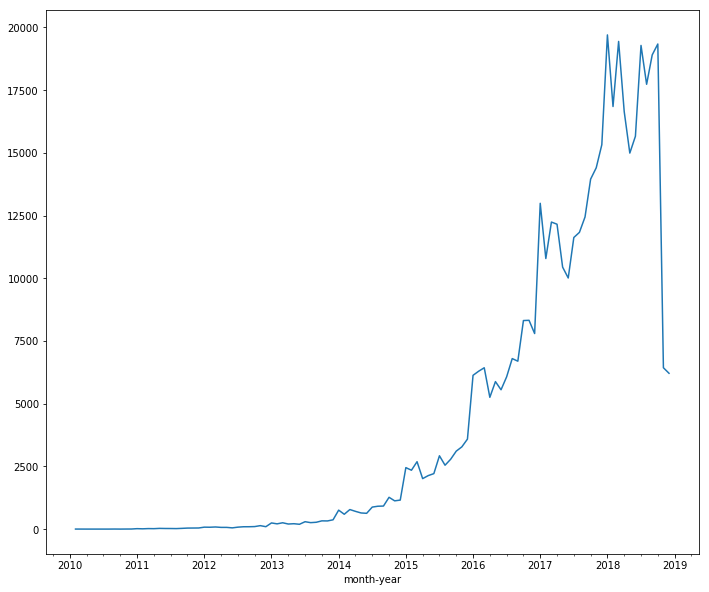

In [53]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)

listing_dates["month-year"]=reviews["date"].dt.to_period('M')
graphed=listing_dates.groupby("month-year").count()
graphed.plot(ax=ax)

In [18]:
#a4_dims = (11.7, 10) #(width, height)
#fig, ax = plt.subplots(figsize=a4_dims)

graphed=new_data.groupby(new_data['host_since'].dt.strftime('%B'))['id'].count().sort_values()

#graphed = new_data.groupby(pd.Grouper(key='host_since', freq='1M'))['id'].size()
graphed=new_data.groupby(new_data['month_year']).agg({'id' : 'count'}).reset_index()
sns.lineplot(x='month_year', y="id",data=new_data)


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000026228A738C8> (for post_execute):


ValueError: view limit minimum -0.05500000000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.05500000000000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Based on the property types, we can see the highest number of properties are apartments. Interestingly enough, you're more likely to gain a higher revenue if your property type is a barn. However, this would be considered an outlier as the total number of barns is very small. As such, if you own an apartment, you will be looking to generate approx 3000. 
We can also see that serviced apartments has the 5th highest number of property type but does not generate much revenue.

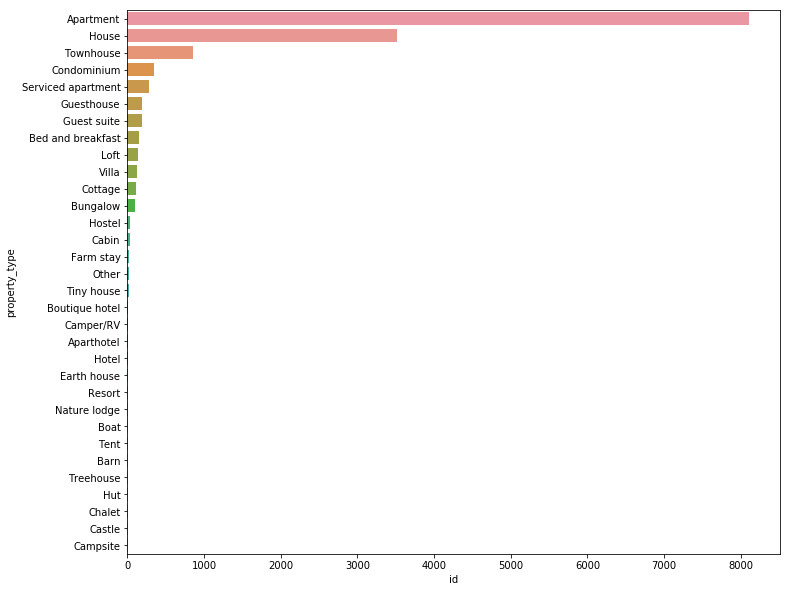

In [34]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['property_type']).agg({'id' : 'count'}).reset_index().sort_values('id', ascending=False)
sns.barplot(x='id', y='property_type', data=new_df, orient='h', ax=ax)


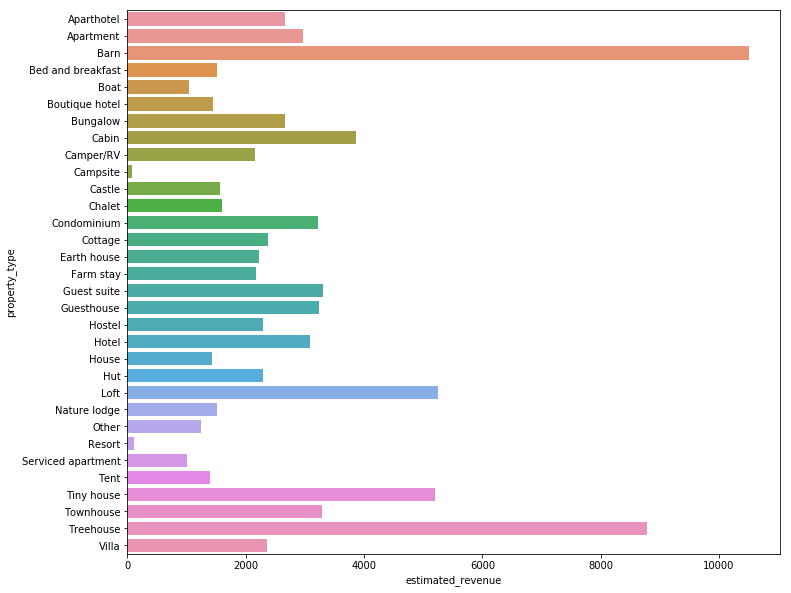

In [98]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['property_type']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='estimated_revenue', y='property_type', data=new_df, orient='h', ax=ax)


In [103]:
new_df.sort_values('estimated_revenue', ascending=False)

,property_type,estimated_revenue
2,Barn,10513.375000
30,Treehouse,8783.833333
22,Loft,5252.981793
28,Tiny house,5196.955556
7,Cabin,3865.949444
16,Guest suite,3302.876682
29,Townhouse,3283.754119
17,Guesthouse,3245.149740
12,Condominium,3215.881541
19,Hotel,3083.592593


We also know that based on distance, there is significantly more properties within 10KM of the CBD property area but does this create more revenue, considering the property is closer to the CBD?

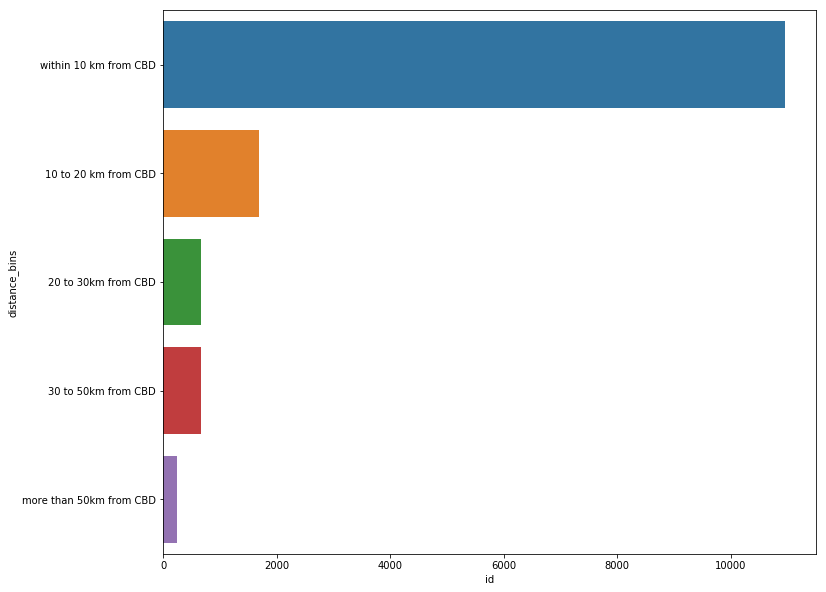

In [35]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['distance_bins']).agg({'id' : 'count'}).reset_index().sort_values('id', ascending=False)
sns.barplot(x='id', y='distance_bins', data=new_df, orient='h', ax=ax)

To answer the above question, yes your property will generate more revenue if your property is located within the 10KM radius. Also another interesting fact is that if your property is located more than 50KM from the CBD, you are likely to get almost the same amount as properties within 10KM of the CBD. 

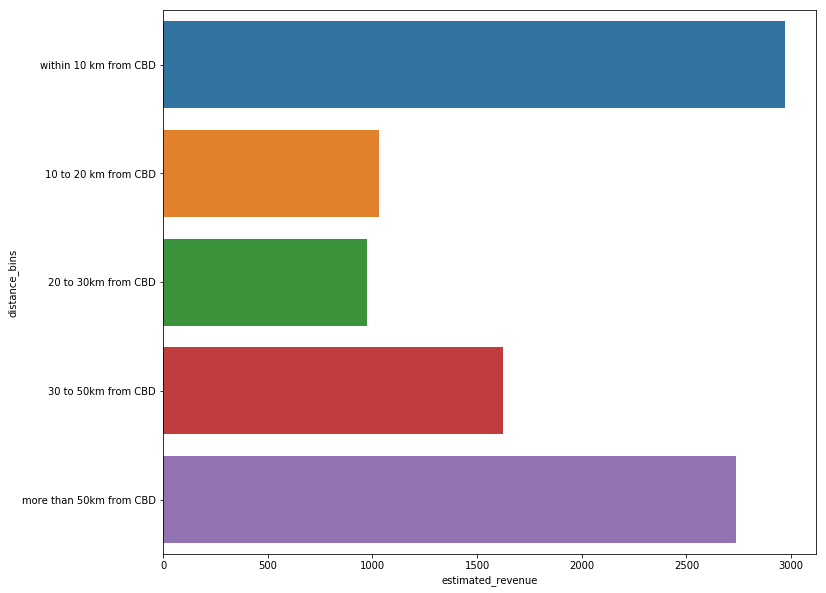

In [39]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['distance_bins']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='estimated_revenue', y='distance_bins', data=new_df, orient='h', ax=ax)

Airbnb's way of rewarding those who have gone above and beyond for their tenants is by giving them the title of Superhost. To obtain this, the host will need to pass a number of requirements. As such, this title is incredibly valuable and this is apparent in the estimated revenue. We can see from the chart below, there is a significant difference in revenue when a host is a superhost.

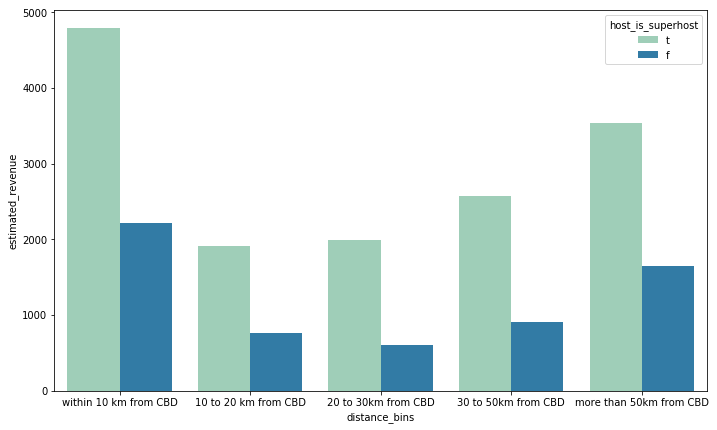

In [40]:
a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
distance_df=new_data.groupby(['distance_bins', 'host_is_superhost']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('host_is_superhost', ascending=False)
sns.barplot(x='distance_bins', y='estimated_revenue', hue='host_is_superhost', data=distance_df, palette="YlGnBu",ax=ax)

The higher the number of bedrooms you have for your property that is within the 10KM from CBD bucket, you will generate more income. 

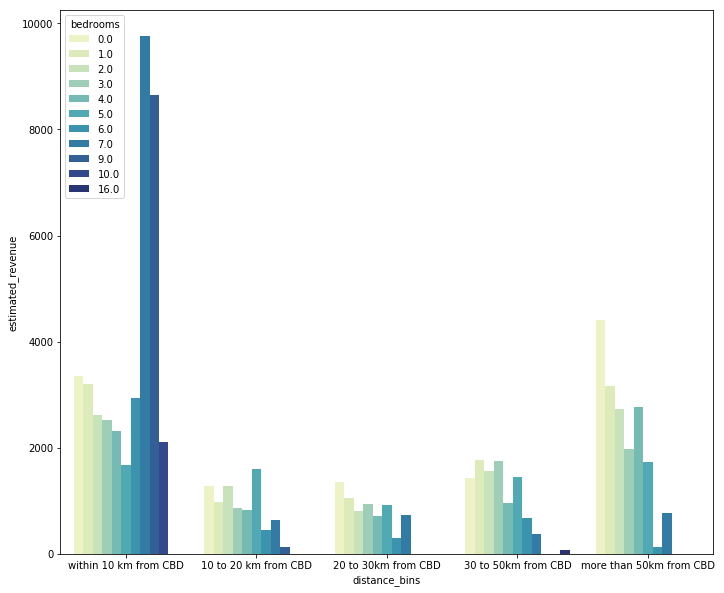

In [106]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
distance_df=new_data.groupby(['distance_bins', 'bedrooms']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('bedrooms', ascending=False)
sns.barplot(x='distance_bins', y='estimated_revenue', hue='bedrooms', data=distance_df, palette="YlGnBu",ax=ax)

ValueError: not enough values to unpack (expected 2, got 1)

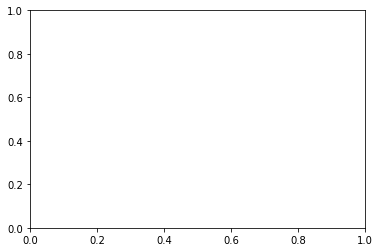

In [63]:
#new_df=new_data[['room_type', 'property_type', 'estimated_revenue']]
#ax=sns.heatmap(new_df)


column_labels = list('room_type')
row_labels = list('property_type')
data = new_df['estimated_revenue']
fig, ax = plt.subplots()
heatmap = ax.pcolor(data)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

You're also likely to generate more revenue if you have the entire apartment rented out compared to a private room, even after normalising the data. My assumption is that people generally like their privacy especially when travelling, plus you get the more space as well

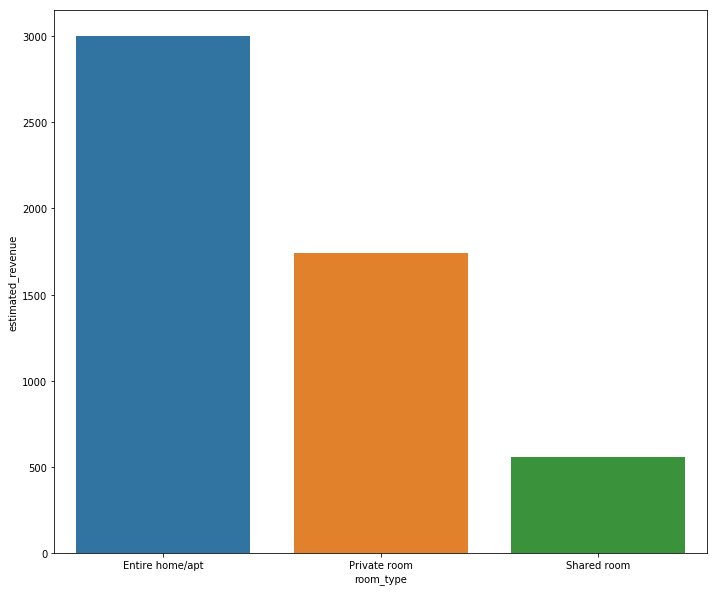

In [77]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['room_type']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='room_type', y='estimated_revenue', data=new_df, ax=ax)

Given that the highest number of property types are apartments, followed by houses, you will generate 1.6 times more income if your listing is for the entire apartment rather than a private room itself. Interestingly, the income generated for an apartment private room is similar to renting out the entire house in this case. 

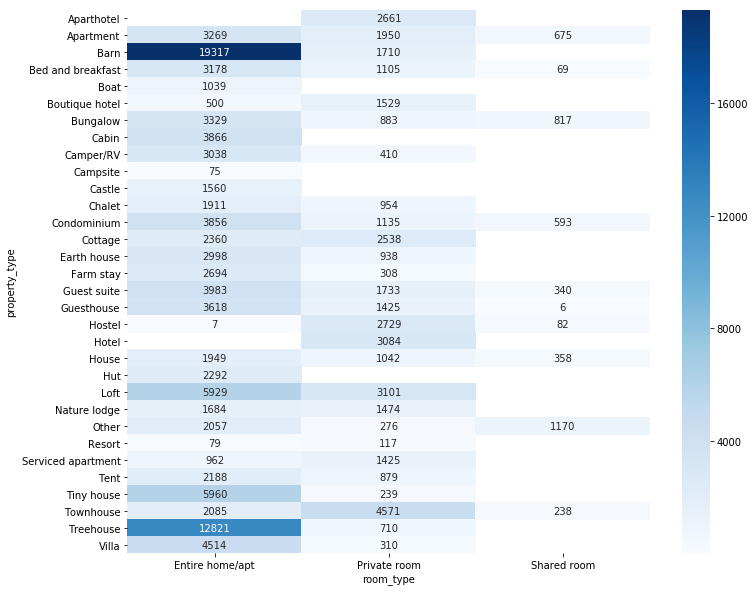

In [31]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
table=pd.pivot_table(new_data, values='estimated_revenue', index=['property_type'],
                         columns=['room_type'], aggfunc=np.mean)
table=table.round(decimals=0)
ax=sns.heatmap(table, fmt='g', annot=True, cmap='Blues', ax=ax)

Based on the 6 bar charts and taking into the score of 10, Airbnb customers prefer properties which has good location and good communication from the host

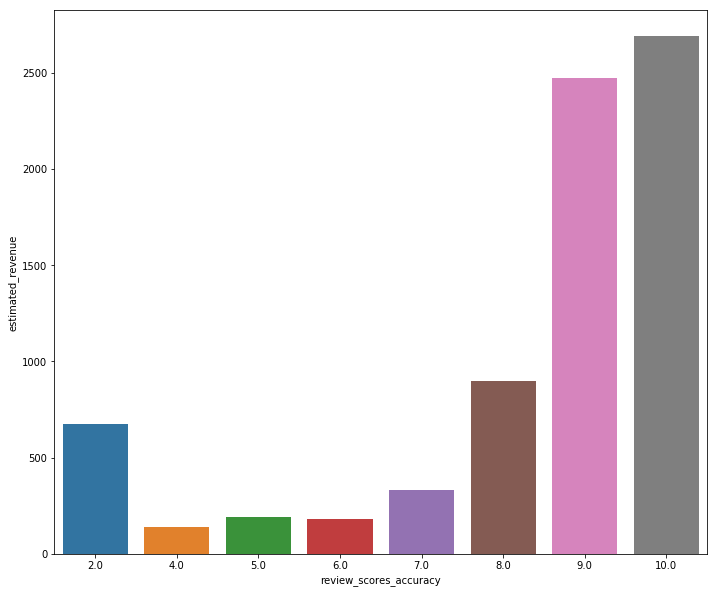

In [78]:
#accuracy review
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['review_scores_accuracy']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='review_scores_accuracy', y='estimated_revenue', data=new_df, ax=ax)

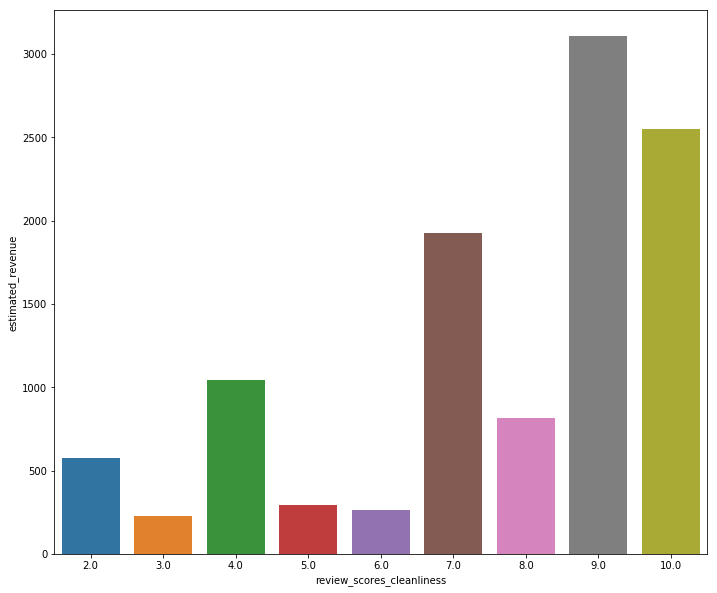

In [80]:
#cleanliness review - not important
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['review_scores_cleanliness']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='review_scores_cleanliness', y='estimated_revenue', data=new_df, ax=ax)

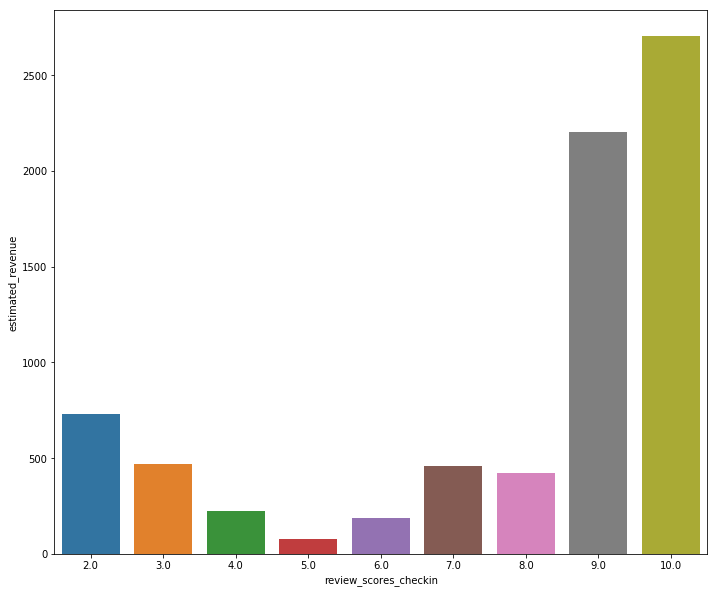

In [82]:
#check in review
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['review_scores_checkin']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='review_scores_checkin', y='estimated_revenue', data=new_df, ax=ax)

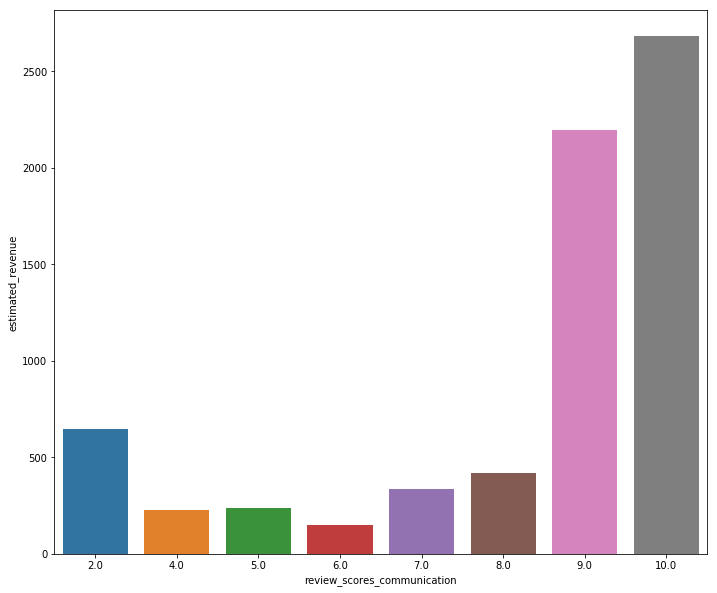

In [83]:
#communication review 
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['review_scores_communication']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='review_scores_communication', y='estimated_revenue', data=new_df, ax=ax)

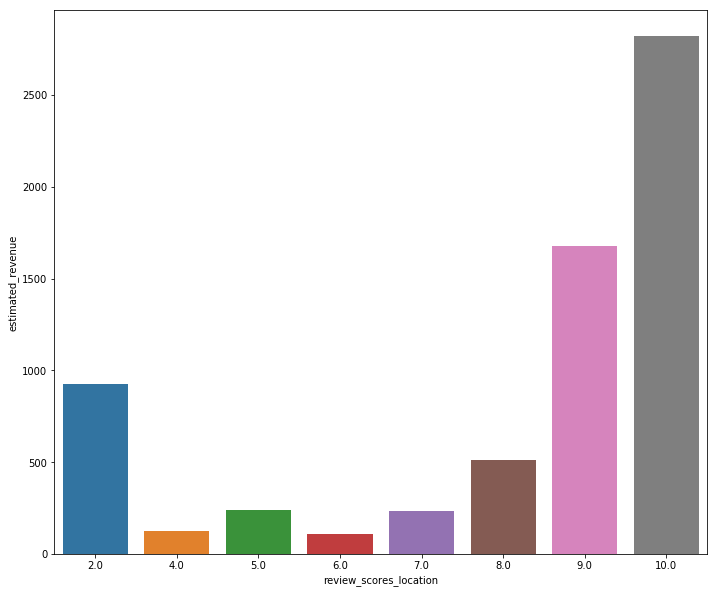

In [84]:
#location review
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['review_scores_location']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='review_scores_location', y='estimated_revenue', data=new_df, ax=ax)


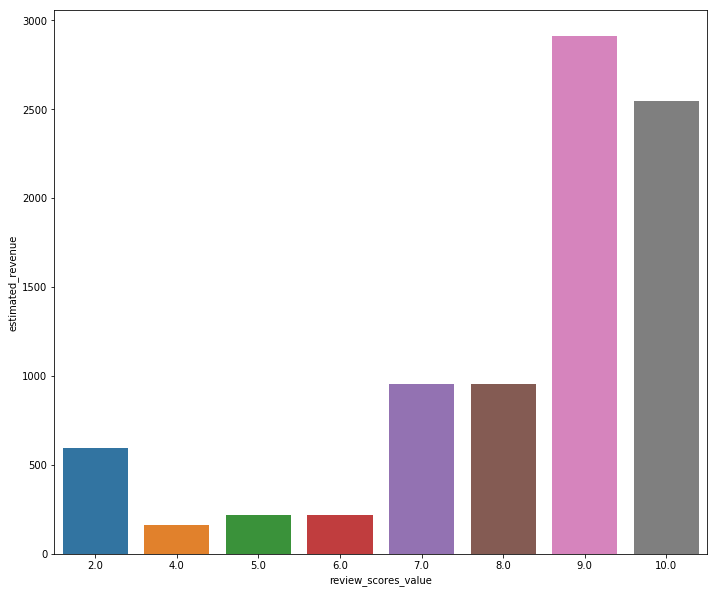

In [85]:
#value review - not important
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['review_scores_value']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='review_scores_value', y='estimated_revenue', data=new_df, ax=ax)

From the below graph, we can see that cleaning fees or security deposits do not have any correlation with the estimated revenue.
As such, regardless of how high you set your cleaning fees or security deposits required, it won't have any affect on your estimated revenue.

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


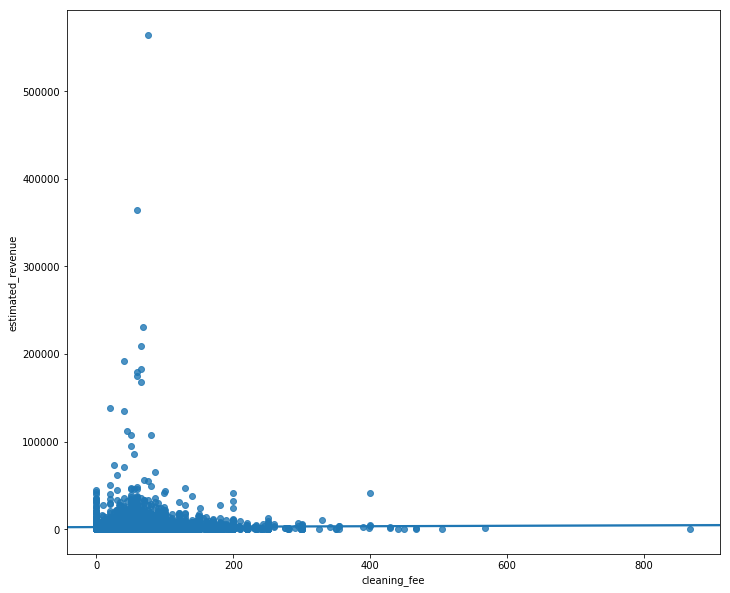

In [91]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=new_data["cleaning_fee"], y=new_data['estimated_revenue'], ax=ax)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


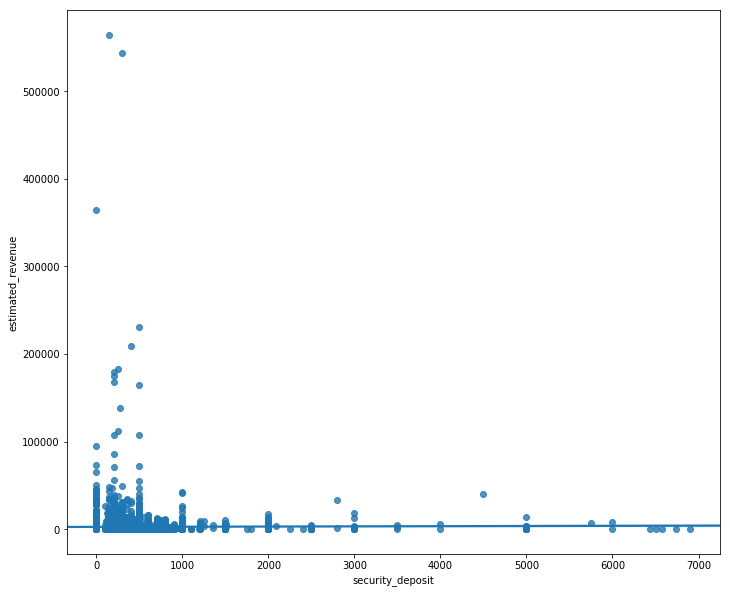

In [92]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=new_data["security_deposit"], y=new_data['estimated_revenue'], ax=ax)

Properties with a super strict cancellation generates significantly more revenue in comparison

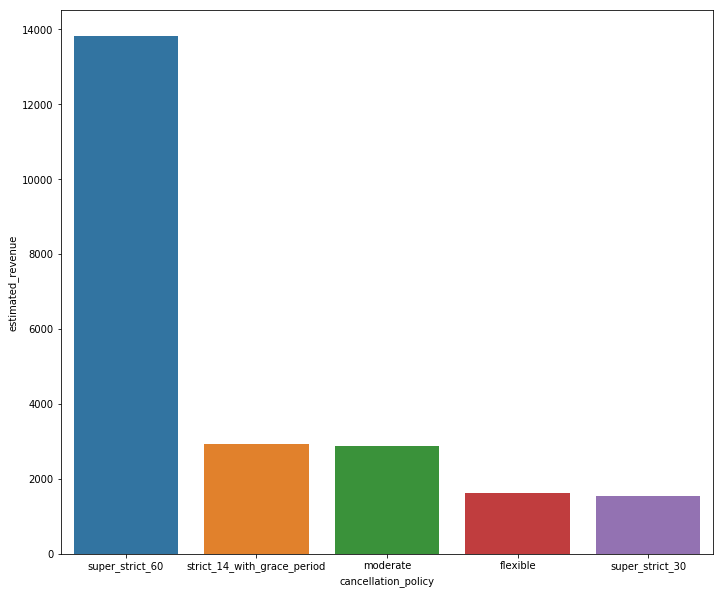

In [95]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['cancellation_policy']).agg({'estimated_revenue' : 'mean'}).reset_index().sort_values('estimated_revenue', ascending=False)
sns.barplot(x='cancellation_policy', y='estimated_revenue', data=new_df, ax=ax)

in summary:
- if your property type is an apartment, you are likely to generate an average revenue of $3,000
- properties within the 10KM radius of the CBD performs better than its counterparts
- there is a significant difference in revenue if you are a superhost
- customers prefer the entire apartment rented out
- Properties with strict cancellation policy fair better
- Customers prefer properties that has good location and communication from their host
- cleaning fees or security deposits do not affect any of the revenue